In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Main Components of a Hopfield Network

1. Neurons: Each neuron has an active (+1) and inactive (-1) state, similar to up and down spin states in spin glass systems. The state vector $\vec{s} = [s_1, s_2, ...]$ represents the configuration of all neurons in the network at a particular time. This has to be updated until the network reaches a stable state (equivalent to low Hamiltonian configuration in spin-glass systems)

2. Weights: Tells us about the strength between neurons. These are learnt while training and constantly updated following the Hebbian learning rule (synaptic plasticity). Here, $w_{ij} = \sum_{\mu = 1}^{p} s_{i}^{\mu} s_{j}^{\mu}$ where $s_{i}^{\mu}$ and $s_{i}^{\mu}$ are elements of the vector that represents the stored pattern $\mu$

## Updating Neurons
Neurons can be updated together (synchronously) or one by one (asynchronously) by $s_{i} = (\text{sign}) \sum_{j} w_{ij}s_{i}$

In [25]:
class image_processing:
    def __init__(self, a):
        self.a = a
        
    def imgload(self, path, a):
        img = Image.open(path)
        img = img.resize((a, a)) # resizing image to have equal width and height
        img = img.convert('1') # converting image to binary format (1) so that each pixel is either black (0) or white (255)
        img = 2 * np.array(img, int) - 1 # converting the binary image to array of integers and then transforming the array into values of -1 or +1
        return img.flatten() # converts 2D array to 1D
        
    def show(self, array):
        a = int(np.sqrt(array.shape[0])) # square root of total number of integers (a x a) in int, shape returns dimensions of array
        array = array.reshape((a, a)) # converting 1D back to 2D
        plt.figure(figsize = (3, 3))
        plt.imshow(array, cmap = 'gray') # image display
        plt.axis('off') # removing axes
        plt.show()

    def noise(self, pixels, img):
        for i in range(pixels):
            if i > pixels/2 - 1:
                img[i] = -1 # making second half of the pixels black (introducing noise)
        return img

In [26]:
class hopfield:
    def __init__(self, n):
        self.n = n # total no of neurons
        self.weight = np.zeros((n, n)) # weight matrix

    def weights(self, img):
        # img here is a 1D array of +1s and -1s representing the image
        self.weight = np.outer(img, img) # finding the outer product of the image vector with itself to generate the weight matrix
        # outer product in linear algebra is like Cartesian product in sets -- all possible combinations of neural connections in the matrix
        np.fill_diagonal(self.weight, 0) # diagonal of weight matrix represents self-connections that are not allowed, so we set the diagonal elements to 0

    def recall(self, state):
        # iterating through each neuron and updating its state
        # applying the equation described in the updating neurons section where s_i is our variable sum_inp
        # if sum_inp > 0, neuron is set to 1 (active), otherwise -1 (inactive)
        new = state.copy() # creating a copy to retain the original vector
        for i in range(self.n):
            sum_inp = np.sum(self.weight[i, :] * new) # i-th row of the matrix and all the neurons (columns) involed * new state
            if sum_inp > 0:
                new[i] = 1
            else:
                new[i] = -1
        return new

Original Images:


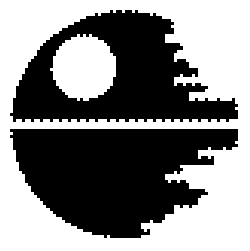

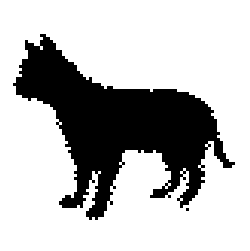

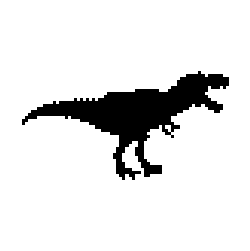

Noisy Image 1:


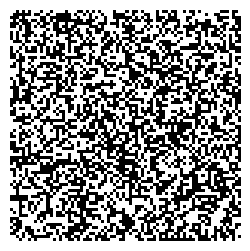

Recalled/Reconstructed Image 1:


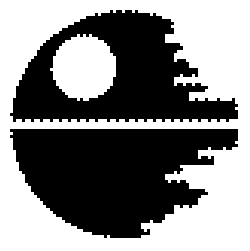

Noisy Image 2:


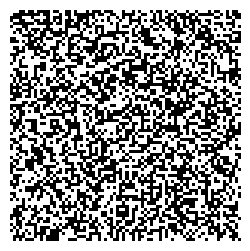

Recalled/Reconstructed Image 2:


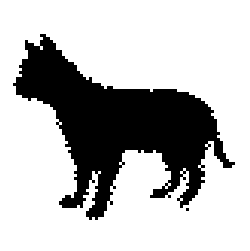

Noisy Image 3:


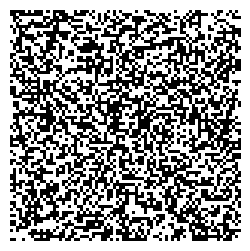

Recalled/Reconstructed Image 3:


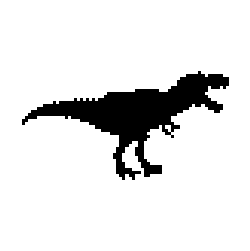

In [27]:
# main stuff

a = 76 # no of pixels on each side
n = a * a # total neurons/pixels

hopfield_net = hopfield(n)
img_proc = image_processing(a)

img = img_proc.imgload('hop_img4.jpg', a)
img2 = img_proc.imgload('hop_img2.png', a)
img3 = img_proc.imgload('hop_img3.jpg', a)

print('Original Images:')
img_proc.show(img)
img_proc.show(img2)
img_proc.show(img3)

# Image 1
print('Noisy Image 1:')
hopfield_net.weights(img)

state = np.random.choice([-1, 1], size = n) # generating random state (initial noisy version)
img_proc.show(state)

state_recall = hopfield_net.recall(state)

print('Recalled/Reconstructed Image 1:')
img_proc.show(state_recall)

# Image 2
print('Noisy Image 2:')
hopfield_net.weights(img2)

state = np.random.choice([-1, 1], size = n)
img_proc.show(state)

state_recall = hopfield_net.recall(state)

print('Recalled/Reconstructed Image 2:')
img_proc.show(state_recall)

# Image 3
print('Noisy Image 3:')
hopfield_net.weights(img3)

state = np.random.choice([-1, 1], size = n)
img_proc.show(state)

state_recall = hopfield_net.recall(state)

print('Recalled/Reconstructed Image 3:')
img_proc.show(state_recall)